In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family'] = 'Times New Roman'

In [32]:
# Plotting hystersis and different limbs
data_origin = pd.read_csv('../ros_ws/origin2.txt')[['theta_x', 'theta_y']]
data_origin_blue = pd.read_csv('../ros_ws/origin_blue.txt')[['theta_x', 'theta_y']]
data_imm = pd.read_csv('../ros_ws/immdiate2.txt')[['theta_x', 'theta_y']]
data_cool = pd.read_csv('../ros_ws/3_min_cool_down_2.txt')[['theta_x', 'theta_y']]

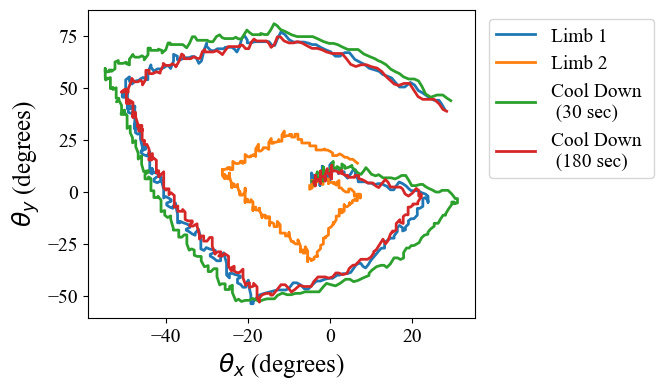

In [37]:
plt.figure(figsize=(5, 4))
plt.plot(data_origin['theta_x'], data_origin['theta_y'], label='Limb 1', linewidth=2)
plt.plot(data_origin_blue['theta_x'], data_origin_blue['theta_y'], label='Limb 2', linewidth=2)
plt.plot(data_imm['theta_x'], data_imm['theta_y'], label='Cool Down \n (30 sec)', linewidth=2)
plt.plot(data_cool['theta_x'], data_cool['theta_y'], label='Cool Down \n (180 sec)', linewidth=2)
plt.xlabel(r"$\theta_x$ (degrees)", fontsize=18)
plt.ylabel(r"$\theta_y$ (degrees)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')

In [41]:

specific_length = 9
# Open the file for reading
with open('/home/ansue1234/Research/SML/RobLimbFK/data_blue_1_limb2_oct_21.txt', 'r') as file:
    # Read all lines from the file
    lines = file.readlines()

# Filter the lines based on the specified length
filtered_lines = [line for line in lines if len(line.strip().split(',')) == specific_length]

with open('explore.csv', 'w') as filtered_file:
    if specific_length == 9:
        first_line = 'time,theta_x,theta_y,X_throttle,Y_throttle,PX_raw,NX_raw,PY_raw,NY_raw\n'
    else:
        first_line = 'time,theta_x,theta_y,pwm_px,pwm_nx,pwm_py,pwm_ny,pwm_px_raw,pwm_nx_raw,pwm_py_raw,pwm_ny_raw\n'
    filtered_file.write(first_line)
    for line in filtered_lines:
        filtered_file.write(line)

In [51]:
df_exp = pd.read_csv('explore.csv')[['theta_x', 'theta_y']]
df_random = pd.read_csv('random.csv')[['theta_x', 'theta_y']]

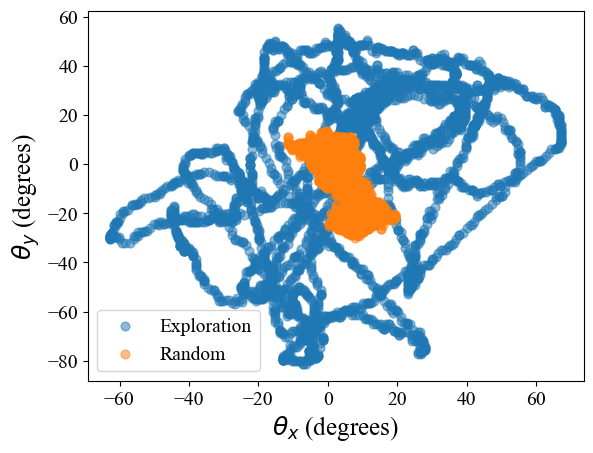

In [65]:
end = int(300//0.075)
plt.scatter(df_exp[['theta_x']].iloc[0:end], df_exp[['theta_y']].iloc[0:end], label='Exploration', s=40, alpha=0.5)
plt.scatter(df_random[['theta_x']].iloc[0:end], df_random[['theta_y']].iloc[0:end], label='Random', alpha=0.5, s=40)
plt.xlabel(r"$\theta_x$ (degrees)", fontsize=18)
plt.ylabel(r"$\theta_y$ (degrees)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)


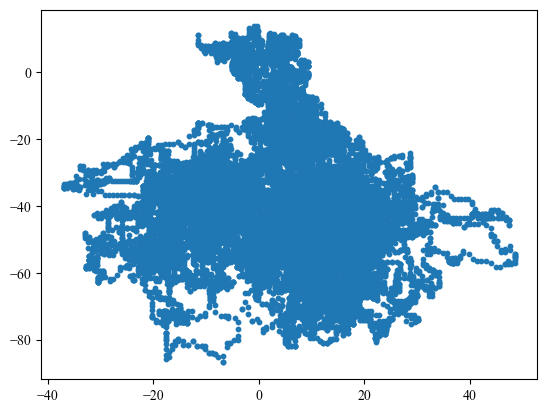

In [44]:
plt.scatter(df_random['theta_x'], df_random['theta_y'], label='Random', s=10)

In [12]:
# Generating input for the model
file_name = 'saw_tooth_blue'
angle_file = '../ros_ws/src/exp_results/' + file_name + '_ang.txt'
throttle_file = '../ros_ws/src/exp_results/'+ file_name + '_thr.txt'

angle_df = pd.read_csv(angle_file)
throttle_df = pd.read_csv(throttle_file)[1:]

# Compute Velocity
angle_df['time_begin'] = (angle_df['time'] - angle_df['time'].iloc[0])/1000
angle_df['dt'] = angle_df['time_begin'].diff()
angle_df['dx'] = angle_df['theta_x'].diff()
angle_df['dy'] = angle_df['theta_y'].diff()
angle_df = angle_df.dropna()
angle_df['vel_x'] = angle_df['dx'] / angle_df['dt']
angle_df['vel_y'] = angle_df['dy'] / angle_df['dt']
angle_df['time_begin_traj'] = angle_df['time_begin']
angle_df = angle_df[['time_begin', 'time_begin_traj', 'theta_x', 'theta_y', 'vel_x', 'vel_y']]
angle_df

,time_begin,time_begin_traj,theta_x,theta_y,vel_x,vel_y
1,0.054,0.054,4.3,-2.54,0.000000,0.0
2,0.159,0.159,4.3,-2.54,0.000000,0.0
3,0.318,0.318,4.3,-2.54,0.000000,0.0
4,0.371,0.371,4.3,-2.54,0.000000,0.0
5,0.424,0.424,4.3,-2.54,0.000000,0.0
...,...,...,...,...,...,...
829,54.060,54.060,-8.2,-4.29,9.807692,0.0
830,54.114,54.114,-8.2,-4.29,0.000000,0.0
831,54.167,54.167,-8.2,-4.29,0.000000,0.0
832,54.220,54.220,-8.2,-4.29,0.000000,0.0


In [13]:
throttle_df.columns = ['X_throttle', 'Y_throttle']

In [14]:
full_df = pd.concat([angle_df, throttle_df], axis=1)
full_df.dropna(inplace=True)
full_df

,time_begin,time_begin_traj,theta_x,theta_y,vel_x,vel_y,X_throttle,Y_throttle
1,0.054,0.054,4.3,-2.54,0.000000,0.0,0.0,0.0
2,0.159,0.159,4.3,-2.54,0.000000,0.0,0.0,0.0
3,0.318,0.318,4.3,-2.54,0.000000,0.0,0.0,0.0
4,0.371,0.371,4.3,-2.54,0.000000,0.0,0.0,0.0
5,0.424,0.424,4.3,-2.54,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
829,54.060,54.060,-8.2,-4.29,9.807692,0.0,0.0,0.0
830,54.114,54.114,-8.2,-4.29,0.000000,0.0,0.0,0.0
831,54.167,54.167,-8.2,-4.29,0.000000,0.0,0.0,0.0
832,54.220,54.220,-8.2,-4.29,0.000000,0.0,0.0,0.0


In [15]:
full_df.to_csv(file_name + '.csv', index=False)